## Entrenamiento con redes neuronales

---

### Con limpieza específica basada en el analisis preliminar

In [44]:
import pandas as pd
import numpy as np


In [45]:
# Importo los datos como dataframe de pandas
real = pd.read_csv("../Data/True.csv")
fake = pd.read_csv("../Data/Fake.csv")

### Aplicamos alguna limpieza previa

Difference in Text

Real news seems to have source of publication which is not present in fake news set

Looking at the data:

*most of text contains reuters information such as "WASHINGTON (Reuters)"

*Some text are tweets from Twitter

*Few text do not contain any publication info

In [46]:
#First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [47]:
#Thus we have list of indices where publisher is not mentioned
#lets check
real.iloc[unknown_publishers].text
#true, they do not have text like "WASHINGTON (Reuters)"

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [48]:
#Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [49]:
#Replace existing text column with new text
#add seperate column for publication info
#real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [50]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [51]:
#dropping this record
real = real.drop(8970, axis=0)

#### Hasta aca se elimino la agencia que solo esta presente en las noticias reales

In [52]:
# Mezclamos los 2 dataframes y los ramdomisamos el orden
from sklearn.utils import shuffle

news = real.append(fake, ignore_index=True)
news = shuffle(news)
news

,title,text,subject,date
40642,TRUMP BLASTS John McCain and Lindsey Graham: T...,Two of the most despicable RINO s (Republicans...,left-news,"Jan 30, 2017"
26424,Ivanka Trump Ordered Some Jewelry And Got OWN...,Ivanka Trump enjoys what someone from that fam...,News,"August 17, 2016"
39291,DEFIANT NFL PLAYERS All Over The Place With Pr...,NFL players were pretty much all over the plac...,left-news,"Oct 1, 2017"
21648,White House Confirms Resident Nazi Stephen Mi...,White house Nazi Stephen Miller is a scumbag. ...,News,"October 11, 2017"
29426,Photographer Captures Horrific Effects Of Cli...,There are many who want to claim that Climate ...,News,"February 18, 2016"
...,...,...,...,...
38662,Judge Napolitano Slams SCOTUS Ruling on Obamacare,,Government News,"Jun 25, 2015"
20648,"U.N. says 270,000 Rohingya fled Myanmar in pas...","An estimated 270,000 Rohingya refugees have f...",worldnews,"September 8, 2017"
24919,Prominent Holocaust Attorney Files MASSIVE La...,Donald Trump is NOT going to like this at all....,News,"December 8, 2016"
31910,NUMEROUS PUBLIC Rapes Of Teenage Girls Reporte...,"Last year, we reported about women who attende...",politics,"Jul 1, 2017"


In [53]:
#news_mask = news['text'] == ' '
#news = news.drop(news[news_mask].index)
#news

[Text(0, 0, 'left-news'),
 Text(1, 0, 'News'),
 Text(2, 0, 'worldnews'),
 Text(3, 0, 'politicsNews'),
 Text(4, 0, 'politics'),
 Text(5, 0, 'Middle-east'),
 Text(6, 0, 'US_News'),
 Text(7, 0, 'Government News')]

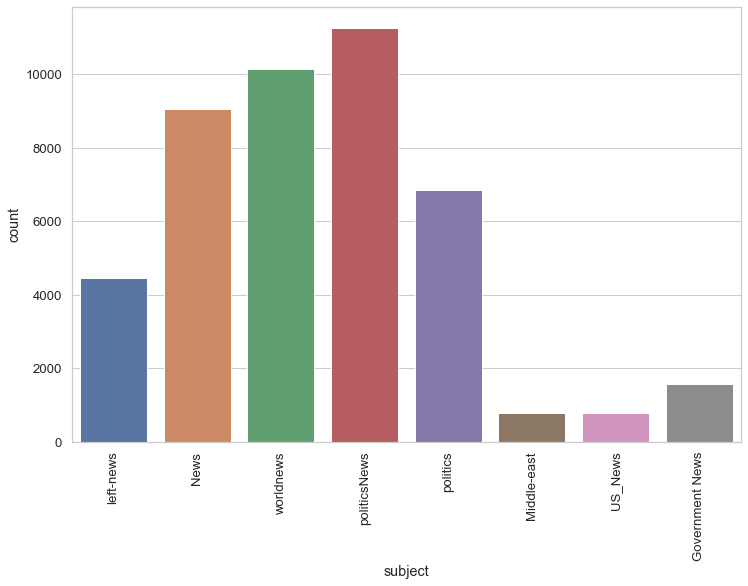

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", data = news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [55]:
#Combinamos columnas de texto
news['text'] = news['title'] + " " + news['text']
news.drop(['title', 'date'], axis=1, inplace=True)
news.sample(5)

,text,subject
4518,ADVISORY: Story on Kushner visiting Iraq withd...,politicsNews
17285,Britain's Johnson says as May heads to Brussel...,worldnews
14644,Iran factions use earthquake relief effort to ...,worldnews
10468,Pennsylvania governor raises minimum wage for ...,politicsNews
23959,"Trump Wants More White House Staffers, What H...",News


In [56]:
news.shape

(44897, 2)

### Codificamos etiquetas

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
news['subject'] = le.fit_transform(news['subject'])
news['subject'].value_counts()

6    11271
7    10145
2     9050
5     6841
4     4459
0     1570
3      783
1      778
Name: subject, dtype: int64

### Continuamos proceso de limpieza

In [58]:
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.corpus import stopwords

In [59]:
#Todo en lower
def to_lower(texto):
    lower_text = texto.lower()
    return lower_text

#Html parser
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Borrar corchetes
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Borrar urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Borrar stopwords
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    punctuation = list(string.punctuation)
    stop.update(punctuation)    
    
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

def denoise_text(text):
    text = to_lower(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    text = text.strip()
    return text

In [60]:
news['text']=news['text'].apply(denoise_text)

In [61]:
news.sample(3)

,text,subject
32194,sick little boy found heart donor hours flotus...,5
41909,king obama proclaimed month june dedicated cel...,4
31234,‘kaep– kaep– kaepernick’…pelosi fumbles defend...,5


Hasta aqui se hizo limpieza general de formato

---

### Separación de sets para entrenamiento, validación y testeo

In [62]:
# Se separan el dataset en los sets de train (luego el de train en validacion) y el de test
# este enfoque se justifica previo a la tokenizacion
from sklearn.model_selection import train_test_split

train, test = train_test_split(news, test_size=0.3, random_state=42)
train, validation = train_test_split(train, test_size = 0.2, random_state=42)
print(len(train), len(validation), len(test) )

25141 6286 13470


---

In [63]:
from tensorflow.keras.preprocessing.text import Tokenizer

vocabulario_max = 20000
filtrar = "!#$%&()*+,-./':;<=>?@[\\]^_`{|}~\t\n"
tokenizer = Tokenizer(num_words=vocabulario_max, filters=filtrar, lower=True, split=" ")
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

In [64]:
# summarize what was learned
#print(tokenizer.word_counts)
#print(tokenizer.document_count)
#print(tokenizer.word_index)
#print(tokenizer.word_docs)

In [65]:
train_matrix = tokenizer.texts_to_matrix(np.array(train.text))
val_matrix = tokenizer.texts_to_matrix(np.array(validation.text))
test_matrix = tokenizer.texts_to_matrix(np.array(test.text))

In [66]:
type(train_matrix)

numpy.ndarray

In [67]:
train_matrix.shape

(25141, 20000)

In [68]:
train_matrix[0:2,:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1., 0., 0.]])

In [69]:
val_matrix.shape

(6286, 20000)

In [70]:
test_matrix.shape

(13470, 20000)

In [71]:
x_train = np.copy(train_matrix)
x_val = np.copy(val_matrix)
x_test = np.copy(test_matrix)
y_train = train['subject'].values
y_val = validation['subject'].values
y_test = test['subject'].values


In [72]:
y_train

array([4, 5, 5, ..., 2, 5, 5])

In [73]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=8)
y_val = to_categorical(y_val, num_classes=8)
#y_test = to_categorical(y_test, num_classes=8)

y_train.shape, y_val.shape, y_test.shape

((25141, 8), (6286, 8), (13470,))

In [74]:
y_test

array([7, 6, 4, ..., 6, 7, 2])

### Aqui comienza la configuracion y entrenamiento de la red base

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Activation

# Creamos un modelo con dos capas ocultas de 16 neuronas cada una
model = Sequential(name="modelo_clean")
model.add(Dense(64, activation='relu', input_shape=(20000,)))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='sigmoid'))

model.summary()

Model: "modelo_clean"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1280064   
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

In [103]:
# Instanciamos nuestro objeto early_stopping y definimos una lista de callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping]

In [104]:
# Importamos la clase ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Instanciamos nuestro objeto reduce_lr y definimos una lista de callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)

# Podemos incorporar este callback al listado anterior y trabajar con ambos a la vez
callbacks_list.append(reduce_lr)

In [105]:
# Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [106]:
# Entrenamos
history = model.fit(x=x_train, y=y_train,
                    epochs=30, batch_size=512, callbacks=callbacks_list, validation_data=(x_val, y_val))

Epoch 1/30
50/50 [==============================] - 9s 187ms/step - loss: 1.8950 - accuracy: 0.2550 - val_loss: 1.8086 - val_accuracy: 0.7272
Epoch 2/30
50/50 [==============================] - 6s 112ms/step - loss: 1.6401 - accuracy: 0.4380 - val_loss: 1.5034 - val_accuracy: 0.7819
Epoch 3/30
50/50 [==============================] - 4s 83ms/step - loss: 1.4452 - accuracy: 0.5621 - val_loss: 1.2156 - val_accuracy: 0.8067
Epoch 4/30
50/50 [==============================] - 4s 78ms/step - loss: 1.2835 - accuracy: 0.6310 - val_loss: 0.9660 - val_accuracy: 0.8078
Epoch 5/30
50/50 [==============================] - 4s 78ms/step - loss: 1.1338 - accuracy: 0.6783 - val_loss: 0.7988 - val_accuracy: 0.8104
Epoch 6/30
50/50 [==============================] - 4s 82ms/step - loss: 1.0045 - accuracy: 0.7056 - val_loss: 0.6534 - val_accuracy: 0.8140
Epoch 7/30
50/50 [==============================] - 5s 99ms/step - loss: 0.9005 - accuracy: 0.7220 - val_loss: 0.5504 - val_accuracy: 0.8128
Epoch 8/30


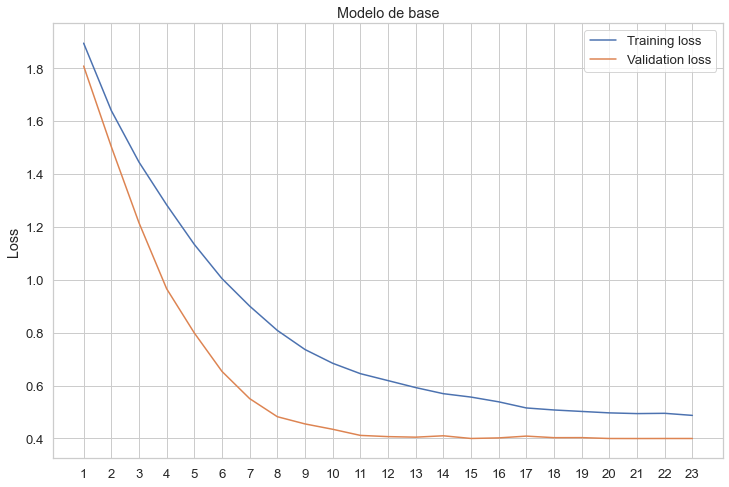

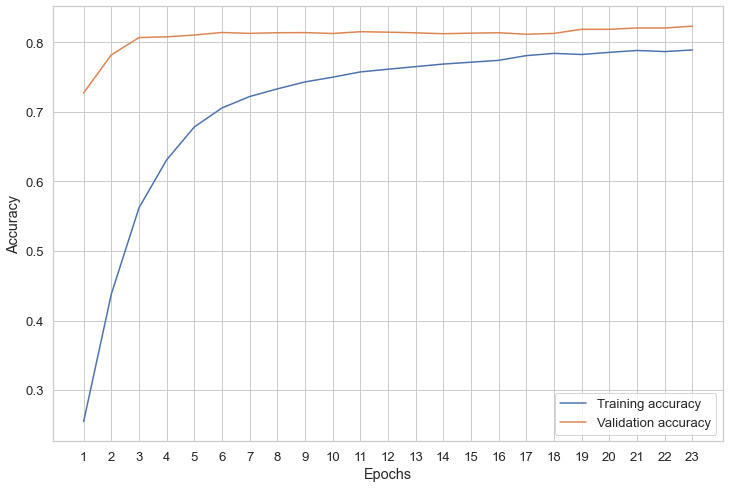

In [107]:
import matplotlib.pyplot as plt
# El atributo `history` contiene un diccionario de métricas por epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

### Testeo

In [108]:
y_pred = model.predict_classes(x_test)

In [109]:
y_pred.shape, y_test.shape

((13470,), (13470,))

In [110]:
y_pred

array([7, 6, 5, ..., 6, 7, 2])

In [111]:
y_test

array([7, 6, 4, ..., 6, 7, 2])

In [112]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       480
           1       0.00      0.00      0.00       240
           2       1.00      0.99      0.99      2719
           3       0.00      0.00      0.00       242
           4       0.00      0.00      0.00      1360
           5       0.52      0.98      0.68      2056
           6       0.97      0.98      0.98      3335
           7       0.85      0.98      0.91      3038

    accuracy                           0.81     13470
   macro avg       0.42      0.49      0.44     13470
weighted avg       0.71      0.81      0.75     13470



In [113]:
cm = confusion_matrix(y_test, y_pred)


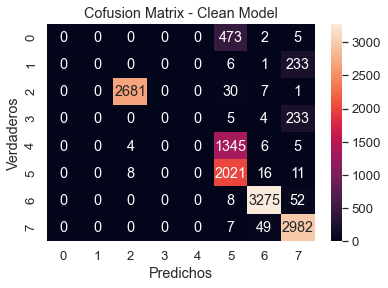

In [114]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - Clean Model')
plt.xlabel('Predichos');